In [ ]:
#!pip install scikit-learn

**1.a) What kind of boundaries is a logistic regression model able to express? Explain why.**

The logistic regression is asymptotically bounded between 0 and 1. This function allows us to classify binary classification problems based on probability. The cutoff can be adjusted based on the slope and intercept parameters in order to adjust the function to the data. Thus if the classes were linearly separable logistic regression will perform very well.


In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


**b) Load the height/weight data from the file heightWeightData.txt. The first column is the class label (1=male, 2=female), the second column is height, the third weight. Note that binary class labels are commonly represented as 0 and 1.**


In [3]:
an_array = np.genfromtxt("heightWeightData.txt", encoding=None, delimiter=",")
y = an_array[:,:1]
y = np.where(y==2, 0, y)  # adjust classification label to {0, 1}
y = y.ravel()             # Return a contiguous flattened array.
y = y.astype(np.int8)     # covert float values to int8. int8 to maximize calculations 

x = an_array[:,1:3]

**c) Train a simple logistic regression model in the first 80% of the data and evaluate the quality in the remaining 20%. State the selected learning rate and the prediction error in the dataset.**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False, random_state=42, test_size=0.20)

# model = LogisticRegression(solver='liblinear', random_state=0, penalty='l1')
# model.fit(X_train, y_train)
# Done to compare with SGDClassifier

model = SGDClassifier(loss="log", penalty="l2", max_iter=1500, eta0=30, random_state=42, learning_rate='adaptive')
model.fit(X_train, y_train)

#print(model.intercept_) 
#print(model.coef_)     
p_pred = model.predict_proba(X_test)   
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred), "\n")
report = classification_report(y_test, y_pred)
print(report)

[[28  3]
 [ 3  8]] 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       0.73      0.73      0.73        11

    accuracy                           0.86        42
   macro avg       0.82      0.82      0.82        42
weighted avg       0.86      0.86      0.86        42



-> The learning rate is adaptive, that is, according to the description of the SGD classifier function, the learning rate decreases throughout the training until it reaches the value 0.0. <br>
-> The prediction error in this dataset is 14% since the accuracy of the model is 86% <br>
-> first eta value is relatively high due to the also high value of the decision variables <br>

**d) Repeat c) but now but first pre-processing the data, centering the data in zero and making the variance unitary for each attribute. Compare the convergence with what occured in c)**

In [17]:
scaler_x = preprocessing.StandardScaler().fit(x)
x_scaled = scaler_x.transform(x)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x_scaled, y, shuffle=False, random_state=42, test_size=0.20)

# model2 = LogisticRegression(solver='liblinear', random_state=0, penalty='l2')
# model2.fit(X_train_scaled, y_train_scaled)

model2 = SGDClassifier(loss="log", penalty="l2", max_iter=350, eta0=0.3, random_state=42, learning_rate='adaptive')
model2.fit(X_train_scaled, y_train)

p_pred_scaled = model2.predict_proba(X_test_scaled)   
y_pred = model2.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred),"\n")
report = classification_report(y_test, y_pred)
print(report)

[[27  4]
 [ 0 11]] 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.73      1.00      0.85        11

    accuracy                           0.90        42
   macro avg       0.87      0.94      0.89        42
weighted avg       0.93      0.90      0.91        42



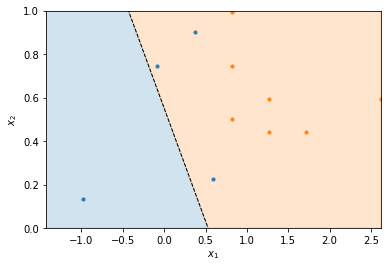

In [ ]:
####  Test  ####
import matplotlib.pyplot as plt
import sklearn.linear_model

# Retrieve the model parameters.
b = model2.intercept_[0]
w1, w2 = model2.coef_.T
# Calculate the intercept and slope of the decision boundary
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary
xmin, xmax = X_test_scaled.min(), X_test_scaled.max()
ymin, ymax = y_test.min(), y_test.max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*(X_test_scaled[y_test==0]).T, s=10, alpha=0.9)
plt.scatter(*(X_test_scaled[y_test==1]).T, s=10, alpha=0.9)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()
 

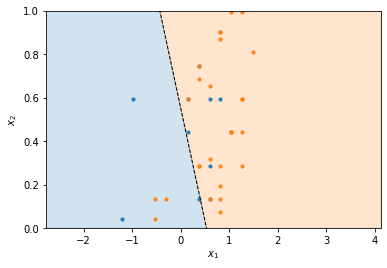

In [ ]:
####  Train  ####

# Plot the data and the classification with the decision boundary
xmin, xmax = X_train_scaled.min(), X_train_scaled.max()
ymin, ymax = y_train.min(), y_train.max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*(X_train_scaled[y_train==0]).T, s=10, alpha=0.9)
plt.scatter(*(X_train_scaled[y_train==1]).T, s=10, alpha=0.9)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

Conclusions for the exercise: <br>
 -> We have done experiments with LogisticRegression and SGDClassifier functions from sklearn. The final choice was SGDClassifier because can classify based in logistic regression if we chose the hiper-parameter loss="log". This choice was also to allow experiments regarding different types of learning_rate. It has been done researches to gather that value according to each iteraion but the conclusion was that it was not possible to monitor the value with sklearn. <br>
  -> From 1C to 1D there was an improvement in the results due to the standardization of variables as expected given that in the package description, this requirement was strongly recommended.<br>
 -> we can confirm that the model with Standardization has a faster convergence due to the number of iterations which is much smaller. <br> 
 -> Two graphs were made with the results of the division made by the algorithm with the training and test data in order to understand if it would be possible with this data set to make a division with a linear line between the observations and the label. Through these graphics we can see that the data is not divisible, justifying an accuracy of less than 100% <br>

Testes

In [ ]:
%tensorflow_version 1.15.2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
## ajustar para dados splited !!!
## https://acervolima.com/ml-regressao-logistica-usando-tensorflow/
# accuracy esta sempre a 100%

an_array = np.genfromtxt("heightWeightData.txt", encoding=None, delimiter=",")
y = an_array[:,:1]
y = np.where(y==2, 0, y)  # adjust classification label to {0, 1}
y = y.ravel()             # Return a contiguous flattened array.
y = y.astype(np.int8)     # covert float values to int8. int8 to maximize calculations 
y = y.reshape(210,1)
x = an_array[:,1:3]

from sklearn import preprocessing
scaler_x = preprocessing.StandardScaler().fit(x)
x_scaled = scaler_x.transform(x)
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x_scaled, y, shuffle=False, random_state=42, test_size=0.20)

alpha, epochs = 0.005, 5
m, n = x.shape

# Train
X1 = tf.placeholder(tf.float32, X_train_scaled.shape)
Y1 = tf.placeholder(tf.float32, [X_train_scaled.shape[0], 1])
# Test
X2 = tf.placeholder(tf.float32, X_test_scaled.shape)
Y2 = tf.placeholder(tf.float32, [y_test.shape[0], 1])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 1]))
# Trainable Variable Bias
b = tf.Variable(tf.zeros(1))

# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X1, W), b))
# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y1)

# Gradient Descent Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost)
# Global Variables Initializer
init = tf.global_variables_initializer()

# Starting the Tensorflow Session
with tf.Session() as sess:
	# Initializing the Variables
	sess.run(init)
	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []
	
	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0

		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X1 : X_train_scaled, Y1 : y_train})
		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X1 : X_train_scaled, Y1 : y_train})
		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),tf.argmax(Y1, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		# não faz sentido pq esta a avaliar com os dados de treino
		accuracy_history.append(accuracy.eval({X1 : X_train_scaled, Y1 : y_train}) * 100)
		# faz sentido mas não funciona 
		#accuracy_history.append(accuracy.eval({X2 : X_test_scaled, Y2 : y_test}) * 100)
	  

		# Displaying result on current Epoch
		if epoch % 2 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "	+ str(cost_history[-1]))
			print(accuracy_history[-1])
	 
	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias
	
	# Final Accuracy
	#correct_prediction = tf.equal(tf.argmax(Y_hat, 1),tf.argmax(Y1, 1))
	#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 2 Cost: 132.066162109375
100.0
Epoch 4 Cost: 131.68209838867188
100.0

Accuracy: 100.0 %


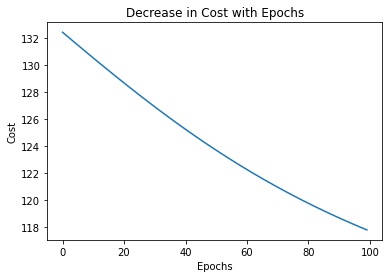

In [ ]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()


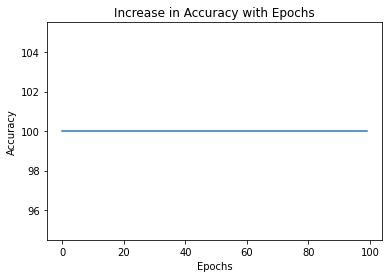

In [ ]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
  
plt.show()